In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import qr

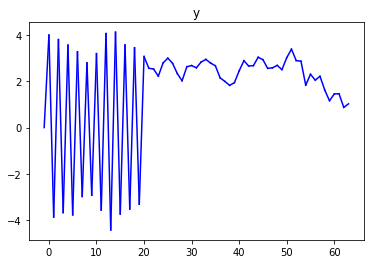

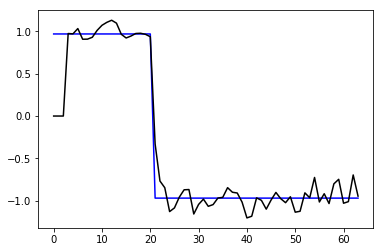

In [6]:
# let us define a first-order DLTI ARMA system: 
a = np.array([1., 0.97])
na = len(a) - 1
b = np.array([4.])
# initial conditions:
u_m1 = 0.
y_m1 = 0.
y_m2 = 0.
# adding noise [TRue/False]:
aggiungo_rumore = True
# forgetting factor (lambda):
lam = 0.5  # 0.5 - 0.99
Ndati = 64
u = np.zeros(Ndati)
y = np.zeros(Ndati)
plt.figure(1); plt.title('y');
a_est = np.zeros((na,Ndati))
a_hist = np.zeros((na+1,Ndati))
w = np.random.randn(Ndati)
for N in range(Ndati):
  #print("N = ",N)
  # parameters variation:
  if N>20: a[1] = -0.97 #endif
  a_hist[1,N] = a[1]
  # input (kronecker delta):
  if N==0:  
    u[N]=1. 
  else: 
    u[N]=0. 
  #endif
  # output:
  y[N] = 1./a[0] * ( -a[1]*y_m1 + b[0]*u[N] )    
  if aggiungo_rumore:
    y[N] = y[N] + 0.3*w[N]   # 0.3
  #endif
  plt.plot([N-1, N],[y_m1, y[N]],'b-'); 
  # compute/update estimates:
  istante_prima_stima = (na+1)+na
  if N > istante_prima_stima: # update
    A = lam * A;   d = lam * d;
    A = np.vstack((A, y[N-na:N-1+1]))
    d = np.vstack((d, -y[N]))
    Q,R = np.linalg.qr(A.copy())
    a_est[:,N] = np.linalg.solve( R , Q.T@d )
  elif N == istante_prima_stima: # first parameter estimate
    # (NB: N >= the first "N" that gives a square A matrix)
    A = np.vstack((A, y[N-na:N-1+1])) 
    d = np.vstack((d, -y[N]))
    Q,R = np.linalg.qr(A.copy())
    a_est[0,N] = np.linalg.solve( R , Q.T@d )
  elif N > na+1:
    A = np.vstack((A, y[N-na:N-1+1])) 
    d = np.vstack((d, -y[N]))
  elif N == na+1:
    A = y[N-na:N-1+1]
    d = np.array(-y[N])
  #endif
  # update past inputs and outputs (NB: start from the oldest!!!)
  u_m1 = u[N]
  y_m2 = y_m1
  y_m1 = y[N]
#endfor
plt.show()
plt.figure(10); plt.plot(np.squeeze(np.array(a_hist[1,:])),'b-'); plt.plot(np.squeeze(np.array(a_est[0,:])),'k-'); plt.show()